In [451]:
import pandas as pd
from pandas.io import sql
from sqlalchemy import create_engine
from sqlalchemy.pool import Pool
import mysql.connector
import json
import csv
import os

import numpy as np
import pymysql as mysql
import matplotlib.pyplot as plt
import requests
import getpass
import seaborn as sns
from pptx import Presentation 
from pptx.util import Inches 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
from sqlalchemy import exc as sa_exc

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=sa_exc.SAWarning)

import warnings
warnings.filterwarnings('ignore')

!pip install mysql-connector-python
!pip install python-pptx

In [454]:
###############################################
# Cleaning the Data
###############################################

# Extract the Data 

In [455]:
#extract the data 


go_1k = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/go_1k.csv"))
go_daily_sales = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/go_daily_sales.csv"))
go_methods = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/go_methods.csv"))
go_products = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/go_products.csv"))
go_retailers = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/go_retailers.csv"))
cpi_monthly = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/1_month_percent_change_in_CPI.csv"))
unemploy_monthly = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/Monthly_unemployment_rate.csv"))
cci_monthly = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/main/GOSales_data/CCI%20CSV.csv"))
gdp_monthly = pd.DataFrame(pd.read_csv("https://github.com/RenettaNelson/ADS-507---SQL-Data-Pipeline/raw/main/GOSales_data/US_Monthly_GDP.csv"))

In [457]:
go_1k.head()

,Retailer code,Product number,Date,Quantity
0,1115,125110,2016-02-09,46
1,1115,144180,2016-04-21,19
2,1115,149140,2017-02-14,11
3,1132,92110,2017-06-13,232
4,1132,96110,2018-06-20,37


In [458]:
go_daily_sales.head()

,Retailer code,Product number,Order method code,Date,Quantity,Unit price,Unit sale price
0,1201,109110,4,2015-01-12,648,76.86,71.48
1,1201,112110,4,2015-01-12,799,10.64,10.21
2,1201,115110,4,2015-01-12,755,10.71,10.28
3,1205,70240,3,2015-01-12,70,122.70,114.11
4,1205,71110,3,2015-01-12,28,95.62,92.75


In [459]:
cci_monthly.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-01,98.33976,NaN
1,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-02,98.64955,NaN
2,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-03,98.96025,NaN
3,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-04,99.13481,NaN
4,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-05,99.21778,NaN


In [460]:
go_products.head()

,Product number,Product line,Product type,Product,Product brand,Product color,Unit cost,Unit price
0,1110,Camping Equipment,Cooking Gear,TrailChef Water Bag,TrailChef,Clear,2.77,6.59
1,2110,Camping Equipment,Cooking Gear,TrailChef Canteen,TrailChef,Brown,6.92,12.92
2,3110,Camping Equipment,Cooking Gear,TrailChef Kitchen Kit,TrailChef,Unspecified,15.78,23.80
3,4110,Camping Equipment,Cooking Gear,TrailChef Cup,TrailChef,Silver,0.85,3.66
4,5110,Camping Equipment,Cooking Gear,TrailChef Cook Set,TrailChef,Silver,34.41,54.93


In [461]:
go_retailers.head()

,Retailer code,Retailer name,Type,Country
0,1101,ActiForme,Equipment Rental Store,France
1,1115,SportsClub,Golf Shop,France
2,1123,Anapurna,Direct Marketing,France
3,1132,Cordages Discount,Warehouse Store,France
4,1133,Altitudes extrêmes,Outdoors Shop,France


In [462]:
cpi_monthly.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2012,0.3,0.2,0.2,0.2,-0.2,-0.1,0.0,0.6,0.5,0.3,-0.2,0.0,NaN,NaN
1,2013,0.2,0.5,-0.3,-0.2,0.0,0.2,0.2,0.2,0.0,0.1,0.2,0.3,NaN,NaN
2,2014,0.2,0.1,0.2,0.2,0.2,0.1,0.1,0.0,0.0,0.0,-0.2,-0.3,NaN,NaN
3,2015,-0.6,0.3,0.3,0.1,0.3,0.3,0.2,0.0,-0.2,0.1,0.1,-0.1,NaN,NaN
4,2016,0.0,-0.1,0.3,0.4,0.2,0.3,-0.1,0.2,0.3,0.2,0.1,0.3,NaN,NaN


In [463]:
unemploy_monthly.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1


In [464]:
gdp_monthly.head()

,Unnamed: 0,Monthly Nominal GDP Index,Monthly Real GDP Index
0,1992 - Jan,6315.583,9485.863
1,1992 - Feb,6356.697,9527.954
2,1992 - Mar,6417.025,9606.158
3,1992 - Apr,6443.138,9612.297
4,1992 - May,6433.851,9594.432


In [465]:
go_1k.duplicated().sum()

0

In [466]:
go_daily_sales.duplicated().sum()

0

In [467]:
cci_monthly.duplicated().sum()

0

In [468]:
go_products['Product number'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Name: Product number, Length: 274, dtype: bool

In [469]:
go_retailers.duplicated().sum()

0

In [470]:
cpi_monthly.duplicated().sum()

0

In [471]:
unemploy_monthly.duplicated().sum()

0

In [472]:
gdp_monthly.duplicated().sum()

0

# Data Transformation

In [473]:
#Modify cci table to add year and month column
cci_monthly['Year'] = pd.DatetimeIndex(cci_monthly['TIME']).year
cci_monthly['Month'] = pd.DatetimeIndex(cci_monthly['TIME']).month
cci_monthly.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Year,Month
0,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-01,98.33976,NaN,2014,1
1,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-02,98.64955,NaN,2014,2
2,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-03,98.96025,NaN,2014,3
3,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-04,99.13481,NaN,2014,4
4,G-20,CCI,AMPLITUD,LTRENDIDX,M,2014-05,99.21778,NaN,2014,5


In [474]:
#add year and month column to go_daily_sales
go_daily_sales['Year'] = pd.DatetimeIndex(go_daily_sales['Date']).year
go_daily_sales['Month'] = pd.DatetimeIndex(go_daily_sales['Date']).month
go_daily_sales.head()

,Retailer code,Product number,Order method code,Date,Quantity,Unit price,Unit sale price,Year,Month
0,1201,109110,4,2015-01-12,648,76.86,71.48,2015,1
1,1201,112110,4,2015-01-12,799,10.64,10.21,2015,1
2,1201,115110,4,2015-01-12,755,10.71,10.28,2015,1
3,1205,70240,3,2015-01-12,70,122.70,114.11,2015,1
4,1205,71110,3,2015-01-12,28,95.62,92.75,2015,1


In [475]:
#add year and month column to go_1k
go_1k['Year'] = pd.DatetimeIndex(go_1k['Date']).year
go_1k['Month'] = pd.DatetimeIndex(go_1k['Date']).month
go_1k.head()

,Retailer code,Product number,Date,Quantity,Year,Month
0,1115,125110,2016-02-09,46,2016,2
1,1115,144180,2016-04-21,19,2016,4
2,1115,149140,2017-02-14,11,2017,2
3,1132,92110,2017-06-13,232,2017,6
4,1132,96110,2018-06-20,37,2018,6


In [476]:
#remove spaces from column names and insert '_'
def spaces(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df.head()

data = [go_1k, go_daily_sales, go_methods, go_products, go_retailers, unemploy_monthly, cpi_monthly, cci_monthly, gdp_monthly]
for i in data:
    spaces(i)

In [477]:
cci_monthly = cci_monthly.rename(columns={"TIME": "Date"})

In [478]:
### drop flag codes columns due to NAN and irrelevance
cci_monthly = cci_monthly.drop(['Flag_Codes', 'LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Date'], axis=1)

In [479]:
cci_monthly.head()

,Value,Year,Month
0,98.33976,2014,1
1,98.64955,2014,2
2,98.96025,2014,3
3,99.13481,2014,4
4,99.21778,2014,5


In [480]:
cci_monthly_t = cci_monthly.pivot('Month', 'Year', 'Value')
cci_monthly_flat = cci_monthly_t.reset_index()
#cci_flat_t = cci_monthly_t.reset_index().melt(id_vars=['Month'])
cci_monthly_flat

Year,Month,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,98.33976,99.97893,99.76099,100.6440,101.6938,101.5941,101.83520,100.7464,100.44430
1,2,98.64955,100.29110,99.68338,100.7118,101.7485,101.7237,101.36030,100.9702,99.76717
2,3,98.96025,100.46260,99.57338,100.7677,101.7409,101.8016,100.56300,101.1698,98.56916
3,4,99.13481,100.51150,99.56274,100.8262,101.6573,101.8281,99.67033,101.3194,97.21022
4,5,99.21778,100.43780,99.66383,100.8472,101.5235,101.8054,99.32137,101.4256,96.36021
5,6,99.32216,100.25100,99.81989,100.8787,101.3918,101.7608,99.41422,101.4328,95.94548
6,7,99.39557,99.99722,99.94318,100.9740,101.3885,101.6478,99.66991,101.1876,95.81496
7,8,99.44980,99.78722,100.02180,101.1492,101.3948,101.5159,99.92449,100.9511,95.86172
8,9,99.48458,99.66364,100.11420,101.4046,101.4076,101.5293,100.18990,100.9080,95.90553
9,10,99.46545,99.66154,100.26600,101.6245,101.4231,101.6347,100.41520,100.8665,95.94320


In [481]:
go_1k = go_1k.drop(['Date'], axis=1)

In [482]:
#Transpose monthly unemployment data
unemployment_monthly = unemploy_monthly.T.set_axis(unemploy_monthly['Year'], axis=1, inplace=False)
unemployment_monthly = unemployment_monthly.drop('Year')
unemployment_monthly.index.names = ['Month']
unemployment_monthly['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
unemployment_monthly = pd.DataFrame(unemployment_monthly)
#unemployment_monthly.set_index('Month', inplace=True)
unemployment_monthly

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Month
Month,,,,,,,,,,,,
Jan,8.0,6.6,5.7,4.8,4.7,4.0,4.0,3.5,6.3,4.0,3.4,1
Feb,7.7,6.7,5.5,4.9,4.6,4.1,3.8,3.5,6.2,3.8,NaN,2
Mar,7.5,6.7,5.4,5.0,4.4,4.0,3.8,4.4,6.1,3.6,NaN,3
Apr,7.6,6.2,5.4,5.1,4.4,4.0,3.6,14.7,6.1,3.6,NaN,4
May,7.5,6.3,5.6,4.8,4.4,3.8,3.7,13.2,5.8,3.6,NaN,5
Jun,7.5,6.1,5.3,4.9,4.3,4.0,3.6,11.0,5.9,3.6,NaN,6
Jul,7.3,6.2,5.2,4.8,4.3,3.8,3.7,10.2,5.4,3.5,NaN,7
Aug,7.2,6.1,5.1,4.9,4.4,3.8,3.7,8.4,5.2,3.7,NaN,8
Sep,7.2,5.9,5.0,5.0,4.3,3.7,3.5,7.9,4.8,3.5,NaN,9


In [483]:
#Transpose monthly cpi data
cpi_monthly_t = cpi_monthly.T.set_axis(cpi_monthly['Year'], axis=1, inplace=False)
cpi_monthly_t = cpi_monthly_t.drop(['Year', 'HALF1',"HALF2"])
cpi_monthly_t.index.names = ['Month']
cpi_monthly_t['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
#cpi_monthly_t.set_index('Month', inplace=True)
cpi_monthly_t = pd.DataFrame(cpi_monthly_t)
cpi_monthly_t

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Month
Month,,,,,,,,,,,,
Jan,0.3,0.2,0.2,-0.6,0.0,0.4,0.4,0.0,0.2,0.2,0.6,1
Feb,0.2,0.5,0.1,0.3,-0.1,0.2,0.3,0.2,0.1,0.4,0.7,2
Mar,0.2,-0.3,0.2,0.3,0.3,0.0,0.0,0.3,-0.4,0.5,1.0,3
Apr,0.2,-0.2,0.2,0.1,0.4,0.1,0.3,0.4,-0.8,0.7,0.4,4
May,-0.2,0.0,0.2,0.3,0.2,-0.1,0.2,0.0,-0.1,0.7,0.9,5
Jun,-0.1,0.2,0.1,0.3,0.3,0.1,0.1,-0.1,0.4,0.8,1.2,6
Jul,0.0,0.2,0.1,0.2,-0.1,0.0,0.1,0.2,0.5,0.4,0.0,7
Aug,0.6,0.2,0.0,0.0,0.2,0.4,0.2,0.1,0.4,0.4,0.2,8
Sep,0.5,0.0,0.0,-0.2,0.3,0.5,0.2,0.2,0.2,0.4,0.4,9


In [484]:
gdp_monthly.head()

,Unnamed:_0,Monthly_Nominal_GDP_Index,Monthly_Real_GDP_Index
0,1992 - Jan,6315.583,9485.863
1,1992 - Feb,6356.697,9527.954
2,1992 - Mar,6417.025,9606.158
3,1992 - Apr,6443.138,9612.297
4,1992 - May,6433.851,9594.432


In [485]:
gdp_monthly = gdp_monthly.drop("Monthly_Nominal_GDP_Index", axis = 1)
gdp_monthly.rename(columns = {'Unnamed:_0': 'Date'}, inplace=True)
gdp_monthly['Date'] = pd.to_datetime(gdp_monthly['Date'])
gdp_monthly['Date'] = gdp_monthly['Date'].dt.strftime('%Y-%m')
gdp_monthly = gdp_monthly.drop(range(0,276))
gdp_monthly = gdp_monthly.drop(range(300, 372))

gdp_monthly

,Date,Monthly_Real_GDP_Index
276,2015-01,17274.838
277,2015-02,17353.545
278,2015-03,17213.689
279,2015-04,17389.551
280,2015-05,17349.749
281,2015-06,17403.536
282,2015-07,17403.909
283,2015-08,17407.732
284,2015-09,17499.930
285,2015-10,17488.269


In [486]:
gdp_monthly['gdp_change'] = gdp_monthly['Monthly_Real_GDP_Index'].diff()
gdp_monthly['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
gdp_monthly['Year'] = [2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016]
gdp_monthly_diff = gdp_monthly.drop(['Date','Monthly_Real_GDP_Index'], axis=1).reset_index()
gdp_monthly_diff

,index,gdp_change,Month,Year
0,276,NaN,1,2015
1,277,78.707,2,2015
2,278,-139.856,3,2015
3,279,175.862,4,2015
4,280,-39.802,5,2015
5,281,53.787,6,2015
6,282,0.373,7,2015
7,283,3.823,8,2015
8,284,92.198,9,2015
9,285,-11.661,10,2015


In [487]:
gdp_diff = pd.DataFrame(gdp_monthly_diff.iloc[0:12,:])
gdp_diff

,index,gdp_change,Month,Year
0,276,NaN,1,2015
1,277,78.707,2,2015
2,278,-139.856,3,2015
3,279,175.862,4,2015
4,280,-39.802,5,2015
5,281,53.787,6,2015
6,282,0.373,7,2015
7,283,3.823,8,2015
8,284,92.198,9,2015
9,285,-11.661,10,2015


In [488]:
gdp_diff['2015'] = gdp_diff['gdp_change']
gdp_diff

,index,gdp_change,Month,Year,2015
0,276,NaN,1,2015,NaN
1,277,78.707,2,2015,78.707
2,278,-139.856,3,2015,-139.856
3,279,175.862,4,2015,175.862
4,280,-39.802,5,2015,-39.802
5,281,53.787,6,2015,53.787
6,282,0.373,7,2015,0.373
7,283,3.823,8,2015,3.823
8,284,92.198,9,2015,92.198
9,285,-11.661,10,2015,-11.661


In [489]:
gdp_diff.drop(['Year', 'gdp_change', 'index'], axis=1)

,Month,2015
0,1,NaN
1,2,78.707
2,3,-139.856
3,4,175.862
4,5,-39.802
5,6,53.787
6,7,0.373
7,8,3.823
8,9,92.198
9,10,-11.661


In [490]:
gdp_diff_2016 = pd.DataFrame(gdp_monthly_diff.iloc[12:24,:]).drop('index', axis=1).reset_index().drop('index', axis=1)
gdp_diff_2016

,gdp_change,Month,Year
0,70.951,1,2016
1,-30.294,2,2016
2,113.065,3,2016
3,12.923,4,2016
4,-54.861,5,2016
5,34.282,6,2016
6,8.228,7,2016
7,107.863,8,2016
8,63.384,9,2016
9,-66.187,10,2016


In [491]:
gdp_diff['2016'] = gdp_diff_2016['gdp_change']
gdp_diff_2015_2016 = gdp_diff[['Month', '2015', '2016']]
gdp_diff_2015_2016

,Month,2015,2016
0,1,NaN,70.951
1,2,78.707,-30.294
2,3,-139.856,113.065
3,4,175.862,12.923
4,5,-39.802,-54.861
5,6,53.787,34.282
6,7,0.373,8.228
7,8,3.823,107.863
8,9,92.198,63.384
9,10,-11.661,-66.187


In [492]:
consumer_index = pd.merge(cci_monthly, go_1k, how='inner',
                 left_on=['Month', 'Year'],
                 right_on=['Month', 'Year'])
consumer_index.head()

,Value,Year,Month,Retailer_code,Product_number,Quantity
0,99.97893,2015,1,1133,134120,222
1,99.97893,2015,1,1137,25110,198
2,99.97893,2015,1,1137,144180,21
3,99.97893,2015,1,1192,143120,159
4,99.97893,2015,1,1194,125120,16


In [493]:
consumer_daily = pd.merge(cci_monthly, go_daily_sales, how='inner',
                         left_on=['Month', 'Year'],
                         right_on=['Month', 'Year'])
consumer_daily

,Value,Year,Month,Retailer_code,Product_number,Order_method_code,Date,Quantity,Unit_price,Unit_sale_price
0,99.97893,2015,1,1201,109110,4,2015-01-12,648,76.86,71.48
1,99.97893,2015,1,1201,112110,4,2015-01-12,799,10.64,10.21
2,99.97893,2015,1,1201,115110,4,2015-01-12,755,10.71,10.28
3,99.97893,2015,1,1205,70240,3,2015-01-12,70,122.70,114.11
4,99.97893,2015,1,1205,71110,3,2015-01-12,28,95.62,92.75
...,...,...,...,...,...,...,...,...,...,...
1995,100.02180,2016,8,1213,97110,2,2016-08-18,129,35.00,33.95
1996,100.02180,2016,8,1213,113110,2,2016-08-18,828,12.81,12.17
1997,100.02180,2016,8,1204,42110,5,2016-08-18,131,160.00,150.40
1998,100.02180,2016,8,1204,43110,5,2016-08-18,65,190.00,178.60


# Load transformed tables to destination database

In [494]:
# Connect to the sql server
connection = mysql.connect(host='localhost',
                         user='root',
                         password=getpass.getpass(prompt='Password:',stream=None))
                          

# create cursor
cursor = connection.cursor()

In [331]:
#Create Database
cursor.execute("CREATE DATABASE wild_wonderful_sales")

1

In [495]:
#create engine to add data to sql database "wild_wonderful_sales"
db_data = 'mysql+mysqlconnector://' + 'root' + ':' + getpass.getpass(prompt='Password:',stream=None) + '@' + 'localhost' + ':3306/' \
       + 'wild_wonderful_sales' + '?charset=utf8mb4'
engine = create_engine(db_data)

In [496]:
def load(df, table):
    df.to_sql(table, engine, if_exists='append', index=False)

df = [go_1k, go_daily_sales, go_methods, go_products, go_retailers, unemployment_monthly, cpi_monthly_t, cci_monthly, gdp_diff_2015_2016, consumer_index, consumer_daily, cci_monthly_flat]
tables = ['go_1k', 'go_daily_sales', 'go_methods', 'go_products', 'go_retailers', 'unemployment_monthly', 'cpi_monthly_t', 'cci_monthly', 'gdp_diff_2015_2016', 'consumer_index', 'consumer_daily', 'cci_monthly_flat']

for i, j in zip(df, tables):
    load(i, j)
print('Tables loaded sucessfully :)')

Tables loaded sucessfully :)


In [497]:
cursor.execute("USE wild_wonderful_sales")

0

# Begin Queries

In [498]:
#2016 CPI and Unemployment
indicators_2016 = pd.DataFrame(pd.read_sql("""SELECT u.`2016` AS Unemp,
                                                   c.`2016` AS CPI,
                                                   g.`2016` AS GDP,
                                                   a.`2016` AS CCI,
                                                   a.Month
                                           FROM unemployment_monthly u
                                                INNER JOIN cpi_monthly_t c
                                                    ON u.Month = c.Month
                                                INNER JOIN gdp_diff_2015_2016 g
                                                    ON c.Month = g.Month
                                                INNER JOIN cci_monthly_flat a
                                                    ON g.Month = a.Month
                                            GROUP BY Month
                                            ;""",
                                                    connection))

                                                    
indicators_2016

,Unemp,CPI,GDP,CCI,Month
0,4.8,0.0,70.951,99.76099,1
1,4.9,-0.1,-30.294,99.68338,2
2,5.0,0.3,113.065,99.57338,3
3,5.1,0.4,12.923,99.56274,4
4,4.8,0.2,-54.861,99.66383,5
5,4.9,0.3,34.282,99.81989,6
6,4.8,-0.1,8.228,99.94318,7
7,4.9,0.2,107.863,100.02180,8
8,5.0,0.3,63.384,100.11420,9
9,4.9,0.2,-66.187,100.26600,10


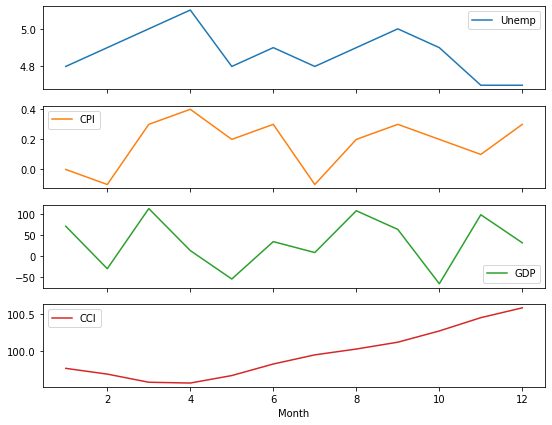

In [499]:
ax = indicators_2016.set_index('Month').plot(subplots=True, figsize=(9,7))
plt.savefig('economic_indicators.png')

In [500]:
#create title slide for pptx output
root = Presentation()

first_slide_layout = root.slide_layouts[0]

slide = root.slides.add_slide(first_slide_layout)

slide.shapes.title.text = "Great Outdoors Sales Performance"

slide.placeholders[1].text = "Including Economic Indicators"

root.save("monthly_metrics.pptx")

print("Title Slide Generated")

Title Slide Generated


### function to make a slide from chart and add it to the pptx

In [501]:
def create_slide(img):
    img_path = img 
  
    # Creating an Presentation object
    ppt = Presentation('monthly_metrics.pptx') 
  
    # Selecting blank slide
    blank_slide_layout = ppt.slide_layouts[6] 
  
    # Attaching slide to ppt
    slide = ppt.slides.add_slide(blank_slide_layout) 

    #For Margins
    left = top = Inches(.5)
 
    # adding images
    pic = slide.shapes.add_picture(img_path, left, top)
  
    # save file
    ppt.save('monthly_metrics.pptx')
  
    print("Done")

In [502]:
create_slide('economic_indicators.png')

Done


In [503]:
#Monthly Sales from January 2015 through August 2016
sales_tot_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month,
                                                     s.Year,
                                                     SUM(s.Unit_sale_price * s.Quantity) AS tot_sales
                                              FROM go_daily_sales s
                                                JOIN unemployment_monthly u
                                                    ON s.Month = u.Month
                                              GROUP BY Month
                                              ;""", 
                                              connection))
sales_tot_monthly

,Month,Year,tot_sales
0,1,2015,40311589.14
1,2,2015,44997188.13
2,3,2015,34095506.85
3,4,2015,38941501.77
4,5,2015,35910597.24
5,6,2015,34611656.94
6,7,2015,43270216.20
7,8,2015,23359558.14
8,9,2015,14915169.90
9,10,2015,14468096.25


In [504]:
#Modify month from numeric and set index
def month(df):
    df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month_name().str.slice(stop=3)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
    df = df.set_index('Month')
    return df.head()

In [505]:
#Monthly Sales from January 2015 through August 2016
sales_tot_monthly = pd.DataFrame(pd.read_sql("SELECT Month, \
                                                     Year,\
                                                     SUM(Unit_sale_price * Quantity) AS tot_sales \
                                              FROM go_daily_sales \
                                              GROUP BY Month, Year;", 
                                              connection))
month(sales_tot_monthly)

,Year,tot_sales
Month,,
Jan,2015,5794481.28
Feb,2015,6601508.04
Mar,2015,4759314.09
Apr,2015,5420498.10
May,2015,5458313.61


Done


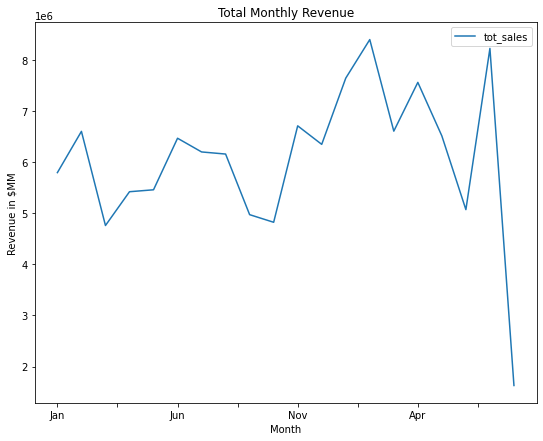

In [506]:
ax = sales_tot_monthly.set_index('Month').drop('Year', axis=1).plot(figsize=(9,7))
ax.set_title('Total Monthly Revenue')
ax.set_ylabel('Revenue in $MM')
plt.savefig('total_monthly_revenue.png')
create_slide('total_monthly_revenue.png')

#Look at revenue by product line

In [507]:
product_line_rev = pd.DataFrame(pd.read_sql("""SELECT p.Product_line,
	                                                SUM(p.Unit_price * s.Quantity) AS revenue
                                            FROM go_daily_sales s
	                                            JOIN go_products p
                                                ON s.Product_number = p.Product_number
                                            GROUP BY Product_line
                                            ORDER BY revenue DESC;""",
                                            connection ))

product_line_rev

,Product_line,revenue
0,Camping Equipment,2.167693e+08
1,Golf Equipment,1.019446e+08
2,Personal Accessories,3.096770e+07
3,Outdoor Protection,2.246931e+07
4,Mountaineering Equipment,1.932994e+07


Done


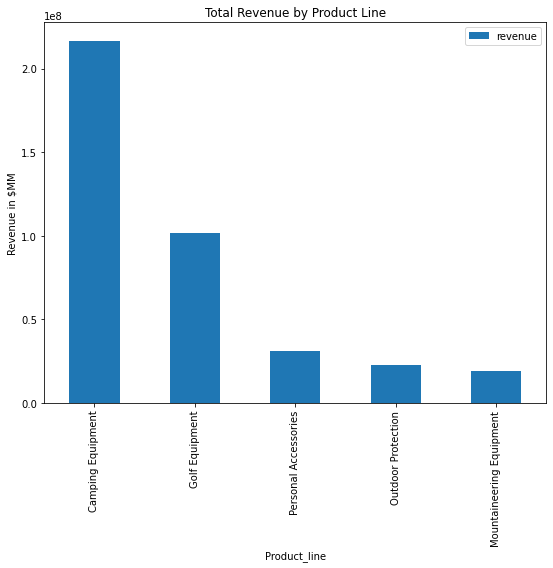

In [508]:
ax = product_line_rev.plot.bar(x="Product_line", figsize=(9,7))
ax.set_title('Total Revenue by Product Line')
ax.set_ylabel('Revenue in $MM')
plt.savefig('product_line_rev.png')
create_slide('product_line_rev.png')

In [509]:
#camping equipment monthly revenue
product_line_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month, p.Product_number,
                                                        s.Year,
                                                        SUM(p.Unit_price * s.Quantity) AS camp_equip_revenue
                                                FROM go_daily_sales s
                                                    JOIN go_products p
                                                    ON s.Product_number = p.Product_number
                                                WHERE Product_line = 'Camping Equipment'
                                                GROUP BY s.Month, s.Year;""", connection))
month(product_line_monthly)


,Product_number,Year,camp_equip_revenue
Month,,,
Jan,3110,2015,9369108.45
Feb,3110,2015,12972744.18
Mar,6110,2015,7438543.65
Apr,3110,2015,10723589.37
May,9110,2015,11467543.14


In [510]:
golf_equip_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month,
                                                        s.Year,
                                                        SUM(p.Unit_price * s.Quantity) AS golf_equip_revenue
                                                FROM go_daily_sales s
                                                    JOIN go_products p
                                                    ON s.Product_number = p.Product_number
                                                WHERE Product_line = 'Golf Equipment'
                                                GROUP BY s.Month, s.Year;""", connection))
month(golf_equip_monthly)
golf_equip_monthly

,Month,Year,golf_equip_revenue
0,Jan,2015,5202163.17
1,Feb,2015,5765875.83
2,Mar,2015,5825867.49
3,Apr,2015,4632107.76
4,May,2015,3962325.78
5,Jun,2015,5448820.59
6,Jul,2015,5784424.02
7,Aug,2015,3260200.59
8,Sep,2015,5657794.74
9,Oct,2015,6298170.39


In [511]:
product_line_monthly['golf_equip_revenue'] = golf_equip_monthly['golf_equip_revenue']
product_line_monthly

,Month,Product_number,Year,camp_equip_revenue,golf_equip_revenue
0,Jan,3110,2015,9369108.45,5202163.17
1,Feb,3110,2015,12972744.18,5765875.83
2,Mar,6110,2015,7438543.65,5825867.49
3,Apr,3110,2015,10723589.37,4632107.76
4,May,9110,2015,11467543.14,3962325.78
5,Jun,3110,2015,10630849.32,5448820.59
6,Jul,25110,2015,10920570.93,5784424.02
7,Aug,9110,2015,14175838.71,3260200.59
8,Sep,8110,2015,8606215.71,5657794.74
9,Oct,6110,2015,7702249.95,6298170.39


In [512]:
personal_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month,
                                                        s.Year,
                                                        SUM(p.Unit_price * s.Quantity) AS personal_revenue
                                                FROM go_daily_sales s
                                                    JOIN go_products p
                                                    ON s.Product_number = p.Product_number
                                                WHERE Product_line = 'Personal Accessories'
                                                GROUP BY s.Month, s.Year;""", connection))
month(personal_monthly)
personal_monthly

,Month,Year,personal_revenue
0,Jan,2015,1670184.45
1,Feb,2015,722458.62
2,Mar,2015,1303069.59
3,Apr,2015,802000.62
4,May,2015,823357.26
5,Jun,2015,1993282.92
6,Jul,2015,2611806.93
7,Aug,2015,989256.42
8,Sep,2015,1093371.12
9,Oct,2015,909417.78


In [513]:
product_line_monthly['personal_accessories_revenue'] = personal_monthly['personal_revenue']
product_line_monthly

,Month,Product_number,Year,camp_equip_revenue,golf_equip_revenue,personal_accessories_revenue
0,Jan,3110,2015,9369108.45,5202163.17,1670184.45
1,Feb,3110,2015,12972744.18,5765875.83,722458.62
2,Mar,6110,2015,7438543.65,5825867.49,1303069.59
3,Apr,3110,2015,10723589.37,4632107.76,802000.62
4,May,9110,2015,11467543.14,3962325.78,823357.26
5,Jun,3110,2015,10630849.32,5448820.59,1993282.92
6,Jul,25110,2015,10920570.93,5784424.02,2611806.93
7,Aug,9110,2015,14175838.71,3260200.59,989256.42
8,Sep,8110,2015,8606215.71,5657794.74,1093371.12
9,Oct,6110,2015,7702249.95,6298170.39,909417.78


In [514]:
outdoor_protect_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month,
                                                        s.Year,
                                                        SUM(p.Unit_price * s.Quantity) AS outdoor_protect_revenue
                                                FROM go_daily_sales s
                                                    JOIN go_products p
                                                    ON s.Product_number = p.Product_number
                                                WHERE Product_line = 'Outdoor Protection'
                                                GROUP BY s.Month, s.Year;""", connection))
month(outdoor_protect_monthly)
outdoor_protect_monthly

,Month,Year,outdoor_protect_revenue
0,Jan,2015,2316084.84
1,Feb,2015,1379291.67
2,Mar,2015,917283.06
3,Apr,2015,1423639.62
4,May,2015,1093686.39
5,Jun,2015,2532728.79
6,Jul,2015,734875.74
7,Aug,2015,1609670.43
8,Sep,2015,663264.00
9,Oct,2015,941074.02


In [515]:
product_line_monthly['outdoor_protect_revenue'] = outdoor_protect_monthly['outdoor_protect_revenue']
product_line_monthly

,Month,Product_number,Year,camp_equip_revenue,golf_equip_revenue,personal_accessories_revenue,outdoor_protect_revenue
0,Jan,3110,2015,9369108.45,5202163.17,1670184.45,2316084.84
1,Feb,3110,2015,12972744.18,5765875.83,722458.62,1379291.67
2,Mar,6110,2015,7438543.65,5825867.49,1303069.59,917283.06
3,Apr,3110,2015,10723589.37,4632107.76,802000.62,1423639.62
4,May,9110,2015,11467543.14,3962325.78,823357.26,1093686.39
5,Jun,3110,2015,10630849.32,5448820.59,1993282.92,2532728.79
6,Jul,25110,2015,10920570.93,5784424.02,2611806.93,734875.74
7,Aug,9110,2015,14175838.71,3260200.59,989256.42,1609670.43
8,Sep,8110,2015,8606215.71,5657794.74,1093371.12,663264.00
9,Oct,6110,2015,7702249.95,6298170.39,909417.78,941074.02


In [516]:
mountaineering_monthly = pd.DataFrame(pd.read_sql("""SELECT s.Month,
                                                        s.Year,
                                                        SUM(p.Unit_price * s.Quantity) AS mountaineering_revenue
                                                FROM go_daily_sales s
                                                    JOIN go_products p
                                                    ON s.Product_number = p.Product_number
                                                WHERE Product_line = 'Mountaineering Equipment'
                                                GROUP BY s.Month, s.Year;""", connection))
month(mountaineering_monthly)
mountaineering_monthly

,Month,Year,mountaineering_revenue
0,Jan,2016,1665000.00
1,Feb,2016,2793942.09
2,Mar,2016,1536180.75
3,Apr,2016,2248574.49
4,May,2016,5092470.63
5,Jun,2016,2063885.04
6,Jul,2016,3293146.62
7,Aug,2016,636743.52


In [517]:
product_line_monthly['mountaineering_revenue'] = mountaineering_monthly['mountaineering_revenue']
product_line_monthly

,Month,Product_number,Year,camp_equip_revenue,golf_equip_revenue,personal_accessories_revenue,outdoor_protect_revenue,mountaineering_revenue
0,Jan,3110,2015,9369108.45,5202163.17,1670184.45,2316084.84,1665000.00
1,Feb,3110,2015,12972744.18,5765875.83,722458.62,1379291.67,2793942.09
2,Mar,6110,2015,7438543.65,5825867.49,1303069.59,917283.06,1536180.75
3,Apr,3110,2015,10723589.37,4632107.76,802000.62,1423639.62,2248574.49
4,May,9110,2015,11467543.14,3962325.78,823357.26,1093686.39,5092470.63
5,Jun,3110,2015,10630849.32,5448820.59,1993282.92,2532728.79,2063885.04
6,Jul,25110,2015,10920570.93,5784424.02,2611806.93,734875.74,3293146.62
7,Aug,9110,2015,14175838.71,3260200.59,989256.42,1609670.43,636743.52
8,Sep,8110,2015,8606215.71,5657794.74,1093371.12,663264.00,NaN
9,Oct,6110,2015,7702249.95,6298170.39,909417.78,941074.02,NaN


Done


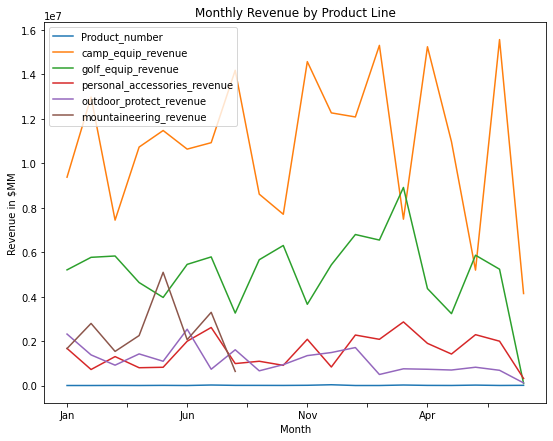

In [518]:
ax = product_line_monthly.set_index('Month').drop('Year', axis=1).plot(figsize=(9, 7))
ax.set_ylabel('Revenue in $MM')
ax.set_title('Monthly Revenue by Product Line')
plt.savefig('product_line_monthly_revenue.png')
create_slide('product_line_monthly_revenue.png')

In [519]:
cci_and_product_no_count = pd.DataFrame(pd.read_sql("""SELECT consumer_index.Value, go_products.Product_line, go_products.Product_type, consumer_index.Month, consumer_index.Year, go_products.Product_number
                                                FROM go_products
                                                INNER JOIN consumer_index ON go_products.Product_number = consumer_index.Product_number
                                            ;""",
                                                    connection))

cci_and_product_no_count

,Value,Product_line,Product_type,Month,Year,Product_number
0,99.97893,Personal Accessories,Knives,1,2015,134120
1,99.97893,Personal Accessories,Knives,1,2015,134120
2,99.97893,Personal Accessories,Knives,1,2015,134120
3,99.97893,Camping Equipment,Packs,1,2015,25110
4,99.97893,Camping Equipment,Packs,1,2015,25110
...,...,...,...,...,...,...
8995,101.38850,Personal Accessories,Eyewear,7,2018,71110
8996,101.38850,Personal Accessories,Eyewear,7,2018,71110
8997,101.38850,Personal Accessories,Eyewear,7,2018,69110
8998,101.38850,Personal Accessories,Eyewear,7,2018,69110


In [520]:
# push sql query back to sql as a table
def load(df, table):
    df.to_sql(table, engine, if_exists='append', index=False)

df = [product_line_monthly, cci_and_product_no_count, indicators_2016]
tables = ['product_line_monthly', 'cci_and_product_no_count', 'indicators_2016']

for i, j in zip(df, tables):
    load(i, j)
print('Tables loaded sucessfully :)')

Tables loaded sucessfully :)


In [521]:
ind_revenue = pd.DataFrame(pd.read_sql("""Select *
                                                FROM product_line_monthly p
                                                WHERE Year = '2016'
                                                GROUP BY Month
                                                ;""",
                                                connection))

In [522]:
# push sql query back to sql as a table
def load(df, table):
    df.to_sql(table, engine, if_exists='append', index=False)

df = [ind_revenue]
tables = ['ind_revenue']

for i, j in zip(df, tables):
    load(i, j)
print('Tables loaded sucessfully :)')

Tables loaded sucessfully :)


In [524]:
ind_revenue_join = pd.DataFrame(pd.read_sql("""Select * 
                                            FROM indicators_2016
                                            FULL JOIN ind_revenue
                                            ON Year
                                            WHERE Year = '2016'
                                            ;""",
                                                    connection))
ind_revenue

,Month,Product_number,Year,camp_equip_revenue,golf_equip_revenue,personal_accessories_revenue,outdoor_protect_revenue,mountaineering_revenue
0,Jan,3110,2016,1341954.89,754619.41,252445.20,189925.21,None
1,Feb,3110,2016,1699471.10,726974.29,231089.45,55367.00,None
2,Mar,25110,2016,831176.60,989724.54,317968.65,83757.74,None
3,Apr,8110,2016,1692656.16,484496.56,210859.70,81442.24,None
4,May,5110,2016,1218050.32,359336.57,157581.09,77696.81,None
5,Jun,21110,2016,576831.52,651156.01,254300.67,91620.36,None
6,Jul,5110,2016,1728492.62,581271.45,221722.82,76358.98,None
7,Aug,11110,2016,459855.79,10606.68,35509.22,13335.00,None


In [525]:
ind_revenue2 = ind_revenue[["camp_equip_revenue", "golf_equip_revenue",	"personal_accessories_revenue",	"outdoor_protect_revenue",	"mountaineering_revenue", "Month"]]
ind_revenue2

,camp_equip_revenue,golf_equip_revenue,personal_accessories_revenue,outdoor_protect_revenue,mountaineering_revenue,Month
0,1341954.89,754619.41,252445.20,189925.21,None,Jan
1,1699471.10,726974.29,231089.45,55367.00,None,Feb
2,831176.60,989724.54,317968.65,83757.74,None,Mar
3,1692656.16,484496.56,210859.70,81442.24,None,Apr
4,1218050.32,359336.57,157581.09,77696.81,None,May
5,576831.52,651156.01,254300.67,91620.36,None,Jun
6,1728492.62,581271.45,221722.82,76358.98,None,Jul
7,459855.79,10606.68,35509.22,13335.00,None,Aug


Done


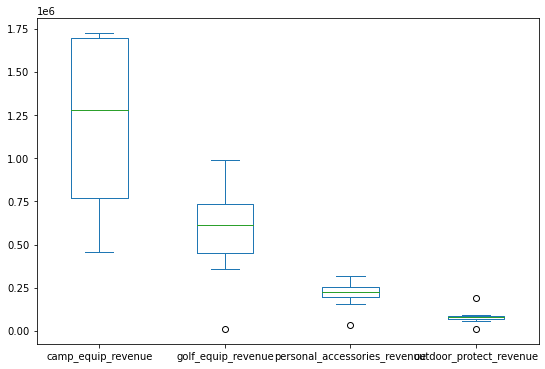

In [526]:
ind_revenue2.plot(kind='box', figsize=(9,6))
ax.set_title('Revenue by Top Product Lines')
plt.savefig('Revenue by Top Product Lines.png')
create_slide('Revenue by Top Product Lines.png')

Done


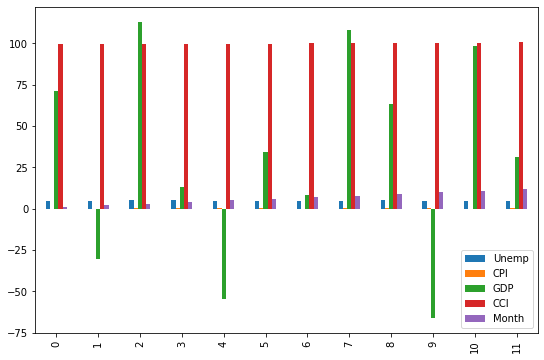

In [527]:
indicators_2016.plot(kind='bar', figsize=(9,6))
ax.set_title('2016 Indicators Bar Chart')
plt.savefig('2016 Indicators Bar Chart.png')
create_slide('2016 Indicators Bar Chart.png')

Done


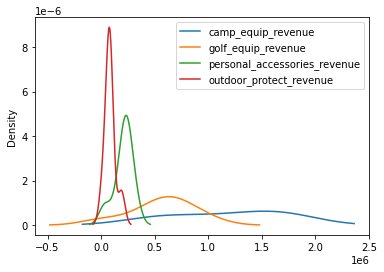

In [528]:
ind_revenue2.set_index('Month').plot(kind='kde')
ax.set_title('2016 Product Line Revenue')
plt.savefig('2016 Product Line Revenue.png')
create_slide('2016 Product Line Revenue.png')

Done


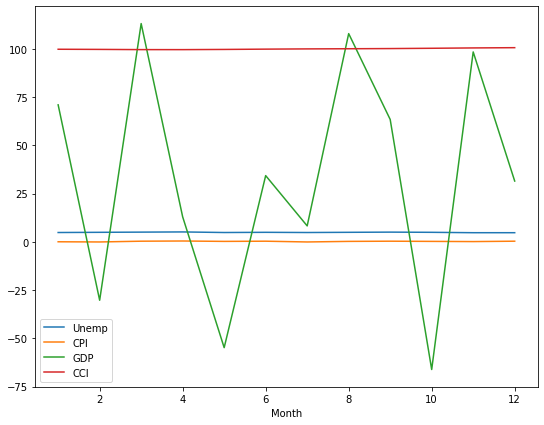

In [529]:
indicators_2016.set_index('Month').plot(figsize=(9,7))
ax.set_title('2016 Indicators Single Chart')
plt.savefig('2016 Indicators Single Chart.png')
create_slide('2016 Indicators Single Chart.png')

Done


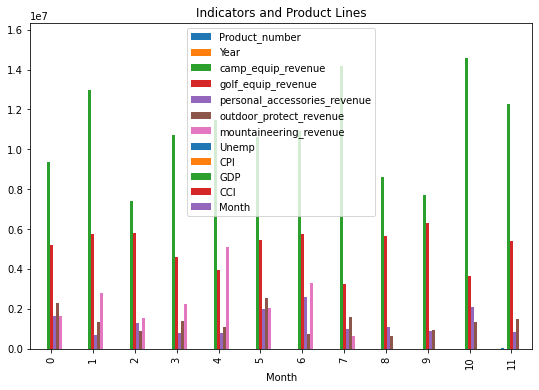

In [530]:
ax = product_line_monthly.set_index('Month').plot(kind='bar', figsize=(9, 7))
indicators_2016.plot(kind='bar', figsize=(9,6),
                        ax = ax)

ax.set_title('Indicators and Product Lines')
plt.savefig('Indicators and Product Lines.png')
create_slide('Indicators and Product Lines.png')

In [446]:
from pandas.plotting import scatter_matrix

#Create powerpoint slides using charts and save to file

In [447]:
# import required classes/functions/method
from pptx import Presentation 
from pptx.chart.data import CategoryChartData 
from pptx.enum.chart import XL_CHART_TYPE 
from pptx.util import Inches

In [448]:
# Create presentation object
ppt = Presentation() 

In [449]:
# Adding slide with specific layout
slide = ppt.slides.add_slide(ppt.slide_layouts[6])

In [450]:
connection.close()